# Final Model 2

_This model will use the information gleaned from the numerical and categorical columns and tests, and hope to create the best model for use._

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LassoCV, LinearRegression, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [2]:
num_train = pd.read_csv('../datasets/num_train.csv')
cat_train = pd.read_csv('../datasets/cat_train.csv')
num_test = pd.read_csv('../datasets/num_test.csv')
cat_test = pd.read_csv('../datasets/cat_test.csv')
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [46]:
X_num_train = num_train[['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 
                         'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
                         '1st Flr SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Kitchen AbvGr',
                         'TotRms AbvGrd', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
                         'Screen Porch', 'Misc Val', 'Exter Qual', 'Bsmt Qual', 
                         'BsmtFin Type 1', 'Heating QC', 'Kitchen Qual', 'Functional', 
                         'Fireplace Qu', 'Garage Finish', 'Pool QC']]

y = train['SalePrice']

X_num_test = num_test [['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 
                        'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
                        '1st Flr SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Kitchen AbvGr',
                        'TotRms AbvGrd', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
                        'Screen Porch', 'Misc Val', 'Exter Qual', 'Bsmt Qual', 
                        'BsmtFin Type 1', 'Heating QC', 'Kitchen Qual', 'Functional', 
                        'Fireplace Qu', 'Garage Finish', 'Pool QC']]

In [4]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_num_train_poly = pf.fit_transform(X_num_train)
X_num_test_poly = pf.transform(X_num_test)

In [5]:
ss = StandardScaler()
X_num_train_poly_scale = pd.DataFrame(ss.fit_transform(X_num_train_poly))
X_num_test_poly_scale = pd.DataFrame(ss.transform(X_num_test_poly))

In [6]:
%%time
rfe = RFE(estimator=LinearRegression(),n_features_to_select=80)
rfe.fit(X_num_train_poly_scale, y)

CPU times: user 14.3 s, sys: 337 ms, total: 14.7 s
Wall time: 7.52 s


In [7]:
X_nums = X_num_train_poly_scale[X_num_train_poly_scale.columns[rfe.get_support(True)]]
X_nums_final = X_num_test_poly_scale[X_num_test_poly_scale.columns[rfe.get_support(True)]]

In [8]:
X_cat_train = cat_train[['MS Zoning_C (all)', 'MS Zoning_RH', 'MS Zoning_RM', 'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_Inside', 'Neighborhood_Blmngtn', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition 1_Feedr', 'Condition 1_Norm', 'Condition 1_PosA', 'Condition 1_PosN', 'Condition 1_RRAe', 'Condition 1_RRAn', 'Condition 2_PosA', 'Condition 2_PosN', 'Bldg Type_1Fam', 'Bldg Type_Twnhs', 'Bldg Type_TwnhsE', 'House Style_1Story', 'House Style_2.5Fin', 'House Style_2Story', 'Exterior 1st_AsbShng', 'Exterior 1st_BrkFace', 'Exterior 1st_CemntBd', 'Exterior 1st_HdBoard', 'Exterior 1st_Stucco', 'Exterior 1st_Wd Sdng', 'Exterior 2nd_Stucco', 'Exterior 2nd_Wd Sdng', 'Exterior 2nd_Wd Shng', 'Mas Vnr Type_BrkCmn', 'Mas Vnr Type_BrkFace', 'Mas Vnr Type_None', 'Mas Vnr Type_Stone', 'Heating_GasW', 'Central Air_N', 'Electrical_SBrkr', 'Garage Type_Attchd', 'Garage Type_BuiltIn', 'Garage Type_None', 'Paved Drive_P', 'Paved Drive_Y', 'Fence_GdPrv', 'Fence_None', 'Sale Type_COD', 'Sale Type_New', 'MS SubClass_120', 'MS SubClass_160', 'MS SubClass_20', 'MS SubClass_30', 'MS SubClass_60', 'MS SubClass_70', 'MS SubClass_75']]

X_cat_final = cat_test[['MS Zoning_C (all)', 'MS Zoning_RH', 'MS Zoning_RM', 'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_Inside', 'Neighborhood_Blmngtn', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition 1_Feedr', 'Condition 1_Norm', 'Condition 1_PosA', 'Condition 1_PosN', 'Condition 1_RRAe', 'Condition 1_RRAn', 'Condition 2_PosA', 'Condition 2_PosN', 'Bldg Type_1Fam', 'Bldg Type_Twnhs', 'Bldg Type_TwnhsE', 'House Style_1Story', 'House Style_2.5Fin', 'House Style_2Story', 'Exterior 1st_AsbShng', 'Exterior 1st_BrkFace', 'Exterior 1st_CemntBd', 'Exterior 1st_HdBoard', 'Exterior 1st_Stucco', 'Exterior 1st_Wd Sdng', 'Exterior 2nd_Stucco', 'Exterior 2nd_Wd Sdng', 'Exterior 2nd_Wd Shng', 'Mas Vnr Type_BrkCmn', 'Mas Vnr Type_BrkFace', 'Mas Vnr Type_None', 'Mas Vnr Type_Stone', 'Heating_GasW', 'Central Air_N', 'Electrical_SBrkr', 'Garage Type_Attchd', 'Garage Type_BuiltIn', 'Garage Type_None', 'Paved Drive_P', 'Paved Drive_Y', 'Fence_GdPrv', 'Fence_None', 'Sale Type_COD', 'Sale Type_New', 'MS SubClass_120', 'MS SubClass_160', 'MS SubClass_20', 'MS SubClass_30', 'MS SubClass_60', 'MS SubClass_70', 'MS SubClass_75']]

In [9]:
rfe1 = RFE(estimator=LinearRegression(),n_features_to_select=65)
rfe1.fit(X_cat_train, y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=65, step=1, verbose=0)

In [10]:
X_cats = X_cat_train[X_cat_train.columns[rfe1.get_support(True)]]
X_cats_final = X_cat_final[X_cat_final.columns[rfe1.get_support(True)]]

In [11]:
X = pd.concat([X_nums, X_cats], axis = 1, sort = False)
X_final = pd.concat([X_nums_final, X_cats_final], axis = 1, sort = False)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [13]:
lasso = LassoCV(n_alphas = 300, cv = 5)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.9258405174209439

In [14]:
y_lasso = lasso.predict(X_final)

In [18]:
graph_lasso = lasso.predict(X_test)

In [15]:
%%time
enet = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1], n_alphas = 300)
enet.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 2.64 s, sys: 214 ms, total: 2.86 s
Wall time: 1.46 s


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [16]:
enet.score(X_test, y_test)

0.9260975956088715

In [17]:
y_enet = enet.predict(X_final)

In [19]:
graph_enet = enet.predict(X_test)

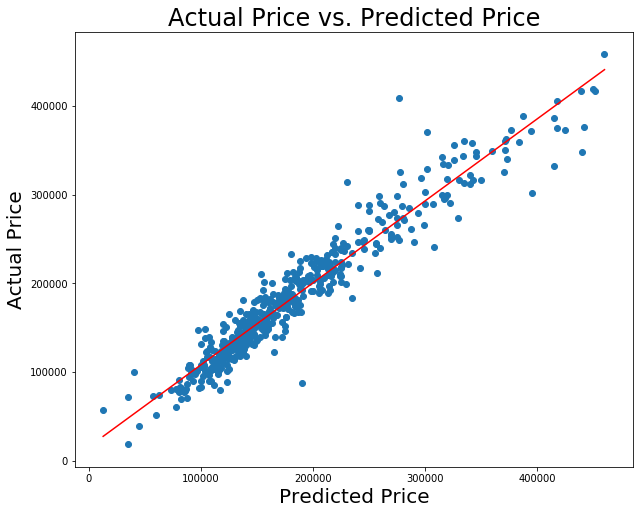

In [45]:
plt.figure(figsize=(10,8), facecolor='w')
plt.title('Actual Price vs. Predicted Price', fontsize = 24)
plt.ylabel('Actual Price', fontsize = 20)
plt.xlabel('Predicted Price', fontsize = 20)
plt.plot(np.unique(y_test), 
         np.poly1d(np.polyfit(y_test, (graph_lasso + graph_enet)/2, 1))(np.unique(y_test)),
         color = 'red')
plt.scatter(y_test, (graph_lasso + graph_enet)/2);
plt.savefig('../foo.png', bbox_inches='tight')

In [32]:
mean_squared_error(y_test, (graph_lasso + graph_enet)/2) ** 0.5

21291.369643558395

In [34]:
r2_score(y_test, (graph_lasso + graph_enet)/2)

0.9261692841299543

In [48]:
cols=[index for index, val in enumerate(lasso.coef_)]

In [51]:
X_train.columns[cols]

Index([                0,                 1,                 2,
                       3,                 4,                 5,
                       6,                 7,                 8,
                       9,
       ...
           'Fence_GdPrv',   'Sale Type_COD',   'Sale Type_New',
       'MS SubClass_120', 'MS SubClass_160',  'MS SubClass_20',
        'MS SubClass_30',  'MS SubClass_60',  'MS SubClass_70',
        'MS SubClass_75'],
      dtype='object', length=145)

In [20]:
submission = test[['Id']]
submission['SalePrice'] = (y_lasso + y_enet)/2
submission.to_csv('../submissions/submission28.csv', index=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
